## 네이버 검색 API 사용

- blog 및 전문자료 호출 방법이 동일
- bolg 검색만 대표로 예제 작성


- 네이버 개발자 센터에 개발자 등록
    - application 생성 (사용 API : 검색)
    - client_id 와 client_secret 두 값을 생성해어 얻어와야 함

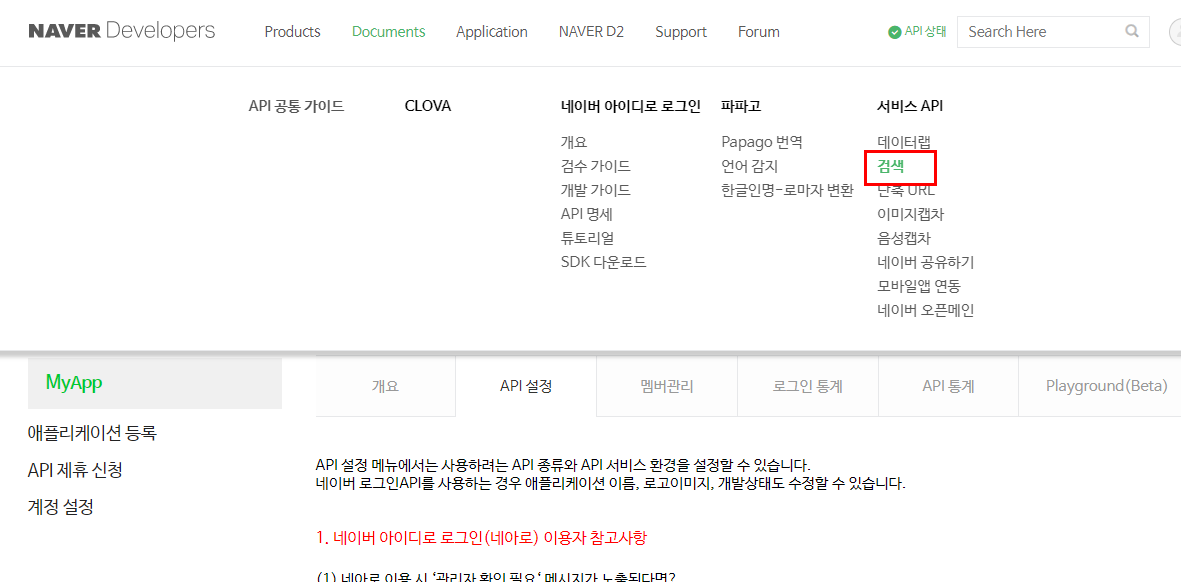

In [1]:
import os
import sys
import urllib.request

In [2]:
## id와 key 변수에 저장

client_id = "STxhK23RTV2IJXshJ6F6"
client_secret = 'aeedTpXFb_'

In [3]:
## 검색어 설정 (utf-8로 인코딩)
## urllib.parse.quote
enc_text = urllib.parse.quote('강남역') ## quote를 통해 검색어 인코딩
enc_text

'%EA%B0%95%EB%82%A8%EC%97%AD'

## url
- 데이터 형태에 따라 2개의 url제공
- https://openapi.naver.com/v1/search/blog.xml
- https://openapi.naver.com/v1/search/blog.json (.json은 생략 가능)

In [5]:
url_base = 'https://openapi.naver.com/v1/search/blog?query=' #query=검색어

In [7]:
url = url_base + enc_text
url

'https://openapi.naver.com/v1/search/blog?query=%EA%B0%95%EB%82%A8%EC%97%AD'

## hearder 부착(id, key 전송)
- urllib.request.Request(url) : 전송 객체 생성
- Request.add_header(헤더) : 헤더 부착
- request.urlopen(request 객첵) : 요청

In [15]:
request = urllib.request.Request(url)

# 헤더 추가 (request에 필요한 요소 추가)
request.add_header('X-Naver-Client-Id', client_id)
request.add_header('X-Naver-Client-Secret', client_secret)

In [16]:
# 요청 후 응답
response = urllib.request.urlopen(request)

# 서버가 전송한 응답코드 확인
rescode = response.getcode()
rescode
## 응답코드 200번 정상 출력 

200

In [17]:
if (rescode==200):
    response_body = response.read() # 전송된 검색 data 읽어오기
    #print(response_body) # encoding 된 결과가 넘어옴
    print(response_body.decode('utf-8'))
else:
    print('Error Code : ' + rescode)

{
"lastBuildDate": "Fri, 06 Aug 2021 15:48:25 +0900",
"total": 1741688,
"start": 1,
"display": 10,
"items": [
{
"title": "재미가 있는 <b>강남역</b> 맛집 공유",
"link": "https:\/\/blog.naver.com\/jung111hee?Redirect=Log&logNo=222455247595",
"description": "감성타코 <b>강남역</b>점 감성그릴파히타 38000원 위치 : 서울 강남구 강남대로 406 지하1층 문의 : 02-565-8830 영업 : 11:30 - 22:00 마지막주문 21:00 제가 다녀온 감성타코는 <b>강남역</b>11번출구 바로 앞에 위치해있어요.... ",
"bloggername": "맛집멋집",
"bloggerlink": "https://blog.naver.com/jung111hee",
"postdate": "20210803"

},
{
"title": "인정했던 <b>강남역</b> 점심",
"link": "https:\/\/blog.naver.com\/sitelove?Redirect=Log&logNo=222457129201",
"description": "동료가 <b>강남역</b> 점심 장소로 괜찮은 특색 있는 장소를 추천해 줘서 다 같이 다녀올 수 있었어요. 저희가 점심에 방문해서 간단한 반주까지 하고 회사에 복귀하게 만들었던 식당은 반티엔야오 카오위예요. <b>강남역</b>... ",
"bloggername": "주관적참견시점",
"bloggerlink": "https://blog.naver.com/sitelove",
"postdate": "20210804"

},
{
"title": "재료가 좋은 삼겹살 <b>강남역</b> 고기집",
"link": "https:\/\/blog.naver.com\/unique1028?Redirect=Log&logNo=222411292448",
"description": "

In [21]:
## requests 패키지 사용 - 코드를 좀 간단하게 변경

import requests #서버접속
from urllib.parse import urlparse #한글처리
import urllib.parse

keyword = urllib.parse.quote("강남역")
url ="https://openapi.naver.com/v1/search/blog?query="
url_fin = url+keyword

#get()안에 url과 headers를 포함 할 수 있음
result = requests.get(url_fin,
      headers={"X-Naver-Client-Id":"STxhK23RTV2IJXshJ6F6",
               "X-Naver-Client-Secret":"aeedTpXFb_"})

json_obj = result.json() # 한글처리와 data 형식을 json으로 변경할 수 있음

In [22]:
json_obj

{'lastBuildDate': 'Fri, 06 Aug 2021 15:54:03 +0900',
 'total': 1741680,
 'start': 1,
 'display': 10,
 'items': [{'title': '재미가 있는 <b>강남역</b> 맛집 공유',
   'link': 'https://blog.naver.com/jung111hee?Redirect=Log&logNo=222455247595',
   'description': '감성타코 <b>강남역</b>점 감성그릴파히타 38000원 위치 : 서울 강남구 강남대로 406 지하1층 문의 : 02-565-8830 영업 : 11:30 - 22:00 마지막주문 21:00 제가 다녀온 감성타코는 <b>강남역</b>11번출구 바로 앞에 위치해있어요.... ',
   'bloggername': '맛집멋집',
   'bloggerlink': 'https://blog.naver.com/jung111hee',
   'postdate': '20210803'},
  {'title': '인정했던 <b>강남역</b> 점심',
   'link': 'https://blog.naver.com/sitelove?Redirect=Log&logNo=222457129201',
   'description': '동료가 <b>강남역</b> 점심 장소로 괜찮은 특색 있는 장소를 추천해 줘서 다 같이 다녀올 수 있었어요. 저희가 점심에 방문해서 간단한 반주까지 하고 회사에 복귀하게 만들었던 식당은 반티엔야오 카오위예요. <b>강남역</b>... ',
   'bloggername': '주관적참견시점',
   'bloggerlink': 'https://blog.naver.com/sitelove',
   'postdate': '20210804'},
  {'title': '재료가 좋은 삼겹살 <b>강남역</b> 고기집',
   'link': 'https://blog.naver.com/unique1028?Redirect=Log&logNo=22241129

In [23]:
print(json_obj["lastBuildDate"])
print(json_obj['total'])
print(json_obj['start'])
print(json_obj['display'])


Fri, 06 Aug 2021 15:54:03 +0900
1741680
1
10


In [32]:
## json data 추출 : dict 처럼 변수 [key]
json_obj['items']

[{'title': '재미가 있는 <b>강남역</b> 맛집 공유',
  'link': 'https://blog.naver.com/jung111hee?Redirect=Log&logNo=222455247595',
  'description': '감성타코 <b>강남역</b>점 감성그릴파히타 38000원 위치 : 서울 강남구 강남대로 406 지하1층 문의 : 02-565-8830 영업 : 11:30 - 22:00 마지막주문 21:00 제가 다녀온 감성타코는 <b>강남역</b>11번출구 바로 앞에 위치해있어요.... ',
  'bloggername': '맛집멋집',
  'bloggerlink': 'https://blog.naver.com/jung111hee',
  'postdate': '20210803'},
 {'title': '인정했던 <b>강남역</b> 점심',
  'link': 'https://blog.naver.com/sitelove?Redirect=Log&logNo=222457129201',
  'description': '동료가 <b>강남역</b> 점심 장소로 괜찮은 특색 있는 장소를 추천해 줘서 다 같이 다녀올 수 있었어요. 저희가 점심에 방문해서 간단한 반주까지 하고 회사에 복귀하게 만들었던 식당은 반티엔야오 카오위예요. <b>강남역</b>... ',
  'bloggername': '주관적참견시점',
  'bloggerlink': 'https://blog.naver.com/sitelove',
  'postdate': '20210804'},
 {'title': '재료가 좋은 삼겹살 <b>강남역</b> 고기집',
  'link': 'https://blog.naver.com/unique1028?Redirect=Log&logNo=222411292448',
  'description': '얼마 전 친구들과 모임 중 강남 일대에서 꽤 알아준다는 <b>강남역</b> 고기집에 다녀왔어요. 화로에 구워 육질이 우수한 돈육에 수제냉면까지, 무엇하나 부족함이 없었던 곳이랍니

In [35]:
for item in json_obj['items']:
    print(item.keys())

dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])
dict_keys(['title', 'link', 'description', 'bloggername', 'bloggerlink', 'postdate'])


In [37]:
for item in json_obj['items']:
    print(len(item.keys()))

6
6
6
6
6
6
6
6
6
6


In [40]:
# title 제목 추출
for item in json_obj['items']:
    print(item['title'])

재미가 있는 <b>강남역</b> 맛집 공유
인정했던 <b>강남역</b> 점심
재료가 좋은 삼겹살 <b>강남역</b> 고기집
최고였던 <b>강남역</b> 고기집
극찬했던 <b>강남역</b> 돼지갈비 맛집
<b>강남역</b> 데이트 맛집, 마마램
<b>강남역</b> 데이트 _ 마마램 feat. 냄새가 1도 없는 양고기
합격점줬던 <b>강남역</b> 고기집
대만족했던 <b>강남역</b> 고기집
끌리는 <b>강남역</b> 고기집


In [42]:
# title 제목 추출
# 불용어 제거 (불필요한 내용)
for item in json_obj['items']:
    print(item['title'].replace('<b>','').replace('</b>',''))

재미가 있는 강남역 맛집 공유
인정했던 강남역 점심
재료가 좋은 삼겹살 강남역 고기집
최고였던 강남역 고기집
극찬했던 강남역 돼지갈비 맛집
강남역 데이트 맛집, 마마램
강남역 데이트 _ 마마램 feat. 냄새가 1도 없는 양고기
합격점줬던 강남역 고기집
대만족했던 강남역 고기집
끌리는 강남역 고기집


In [43]:
## 검색 결과 100개로 늘리기

keyword = "강남역"
url ="https://openapi.naver.com/v1/search/blog?query="
url_fin = url + keyword + '&display=100'

result = requests.get(url_fin,
      headers={"X-Naver-Client-Id":"STxhK23RTV2IJXshJ6F6",
               "X-Naver-Client-Secret":"aeedTpXFb_"})



In [44]:
#items를 제외한 4개의 key value 추출
json_obj = result.json()
print(json_obj["lastBuildDate"])
print(json_obj['total']) #전체 검색 개수
print(json_obj['start']) #반환되는 data의 시작 값, 기본 1
print(json_obj['display'])#반환되는 검색 data 개수, 기본 10


Fri, 06 Aug 2021 16:08:07 +0900
1741691
1
100


## 연습문제

In [ ]:
## 원하는 검색어를 설정한 후 
## 글제목, 설명, 세부링크, 블로거명, 블로그 주소, 생성날짜를 추출해서 df로 저장
## 200개 data를 저장